In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('../data/FD.csv')

In [4]:
#convert timeStamp from object to actual time stamp
df['opening_date'] = pd.to_datetime(df['opening_date'])

In [5]:
type(df['opening_date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
df['Oyear'] = df['opening_date'].apply(lambda time: time.year)
df['OMonth'] = df['opening_date'].apply(lambda time: time.month)
df['ODay'] = df['opening_date'].apply(lambda time: time.day)

In [7]:
#convert timeStamp from object to actual time stamp
df['c_date'] = pd.to_datetime(df['c_date'])

In [8]:
type(df['c_date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df['Myear'] = df['c_date'].apply(lambda time: time.year)

In [10]:
df.head()

,Unnamed: 0,Region,gender,peroid,roi,amt,FD_loan,opening_date,c_date,Oyear,OMonth,ODay,Myear
0,0,Gujarat,M,7,7.5,24113486,0,2015-08-16,2022-08-16,2015,8,16,2022
1,1,Maharashtra,M,1,7.5,16690031,1,2016-11-09,2017-11-09,2016,11,9,2017
2,2,MP,F,3,7.5,42353472,1,2016-07-05,2019-07-05,2016,7,5,2019
3,3,Karnataka,M,6,7.5,14520066,1,2016-01-15,2022-01-15,2016,1,15,2022
4,4,Gujarat,F,6,7.5,61374434,0,2017-12-15,2023-12-15,2017,12,15,2023


In [11]:
tmp=df['Region'].value_counts().to_dict()

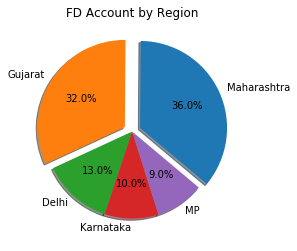

In [12]:
plt.title('FD Account by Region')
plt.pie(x=list(tmp.values()),labels=list(tmp.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0.1,0,0,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

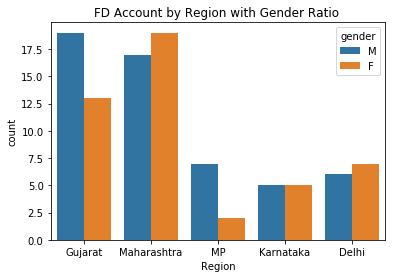

In [13]:
plt.title('FD Account by Region with Gender Ratio ')
sns.countplot(x='Region',hue='gender',data=df)

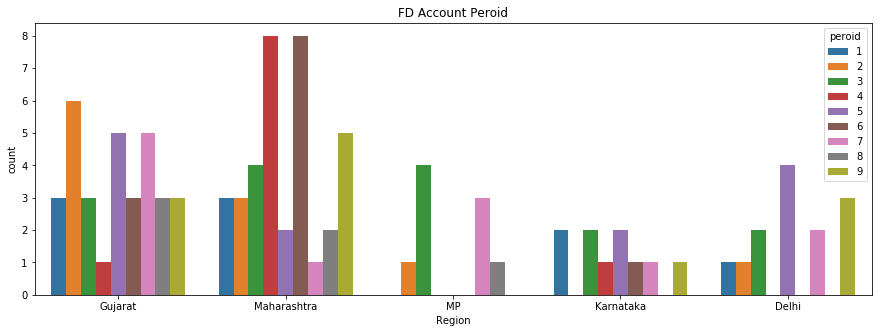

In [14]:
plt.figure(figsize=(15,5))
plt.title('FD Account Peroid')
sns.countplot(x='Region',hue='peroid',data=df)

In [15]:
x=df['gender'].value_counts().to_dict()

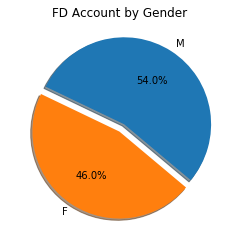

In [16]:
plt.title('FD Account by Gender')
plt.pie(x=list(x.values()),labels=list(x.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

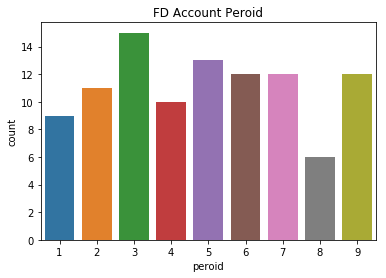

In [17]:
plt.title('FD Account Peroid')
sns.countplot(x='peroid',data=df)

In [18]:
x=df['FD_loan'].value_counts().to_dict()

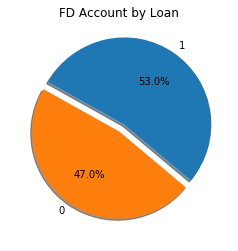

In [19]:
plt.title('FD Account by Loan')
plt.pie(x=list(x.values()),labels=list(x.keys()),data=df,shadow=True,startangle=-40,autopct='%1.1f%%',explode=(0.1,0))
plt.Circle((0,0),0.80,color='black', fc='white',linewidth=1.25)

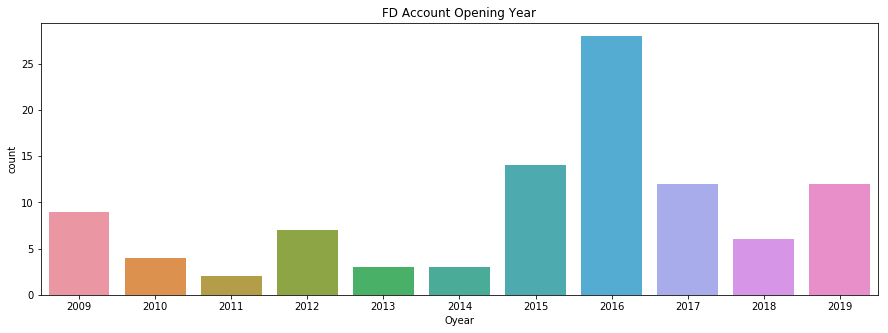

In [20]:
plt.figure(figsize=(15,5))
plt.title('FD Account Opening Year')
sns.countplot(x='Oyear',data=df)

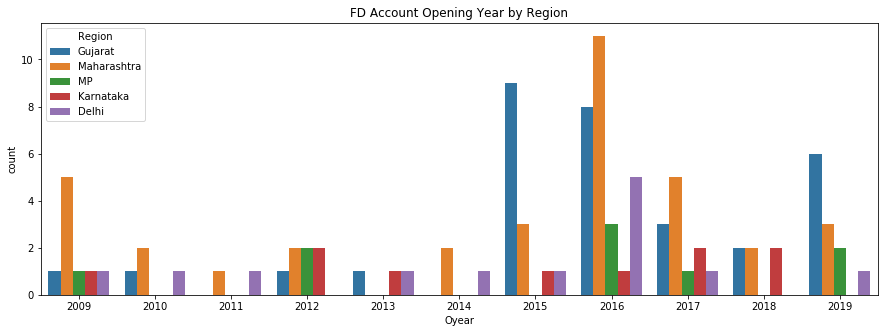

In [21]:
plt.figure(figsize=(15,5))
plt.title('FD Account Opening Year by Region')
sns.countplot(x='Oyear',hue='Region',data=df)

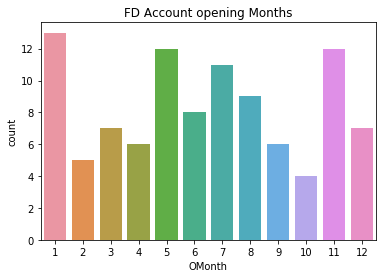

In [22]:
plt.title('FD Account opening Months')
sns.countplot(x='OMonth',data=df)

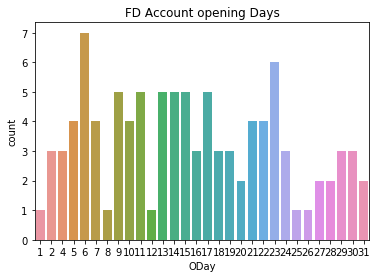

In [23]:
plt.title('FD Account opening Days')
sns.countplot(x='ODay',data=df)

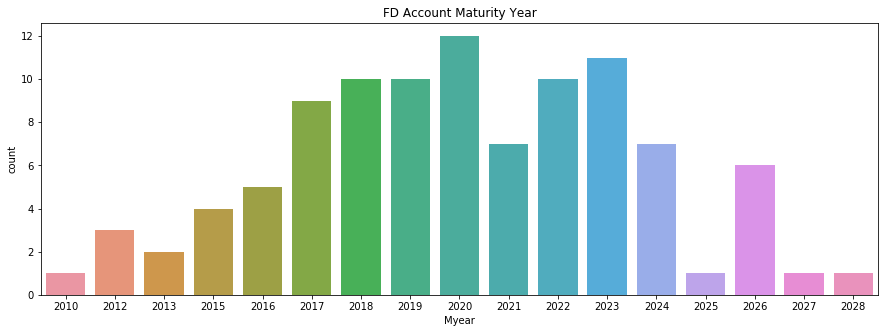

In [24]:
plt.figure(figsize=(15,5))
plt.title('FD Account Maturity Year')
sns.countplot(x='Myear',data=df)

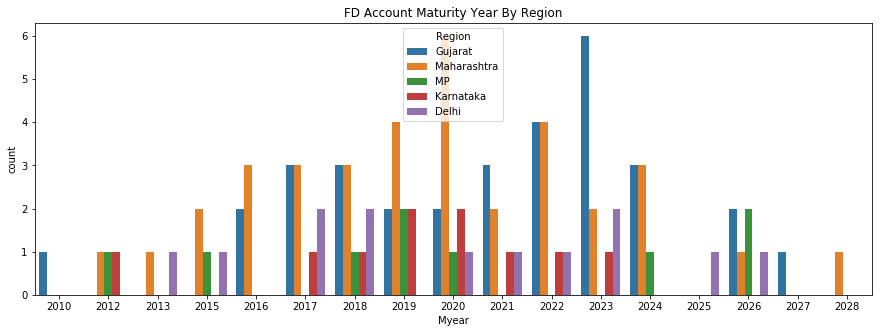

In [25]:
plt.figure(figsize=(15,5))
plt.title('FD Account Maturity Year By Region')
sns.countplot(x='Myear',hue='Region',data=df)

In [26]:
x=df.groupby('Region').mean()
x

,Unnamed: 0,peroid,roi,amt,FD_loan,Oyear,OMonth,ODay,Myear
Region,,,,,,,,,
Delhi,36.384615,5.384615,7.5,4.707914e+07,0.538462,2014.461538,5.230769,11.923077,2019.846154
Gujarat,54.312500,4.906250,7.5,4.028556e+07,0.531250,2015.875000,6.687500,18.281250,2020.781250
Karnataka,47.600000,4.400000,7.5,3.356899e+07,0.600000,2014.700000,7.000000,14.800000,2019.100000
MP,39.222222,4.777778,7.5,4.100899e+07,0.666667,2015.111111,6.222222,16.555556,2019.888889
Maharashtra,53.055556,4.972222,7.5,3.862008e+07,0.472222,2014.638889,6.305556,14.111111,2019.611111


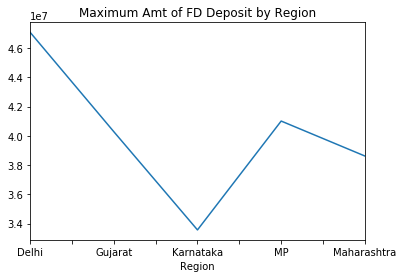

In [27]:
plt.title('Maximum Amt of FD Deposit by Region')
x['amt'].plot()